In [22]:
import pandas as pd
pd.options.display.max_rows = None
pd.options.display.max_columns = None
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [23]:
df_train = pd.read_csv('../data/iith_foml_2023_train.csv')
df_corr = df_train.corr()
# display(df_corr.where(df_corr > 0.75))
for column in df_train.columns:
    if df_train[column].isna().any():
        mean_value = df_train[column].mean()
        df_train[column].fillna(mean_value, inplace=True)

In [24]:
# from sklearn.utils.class_weight import compute_sample_weight, compute_class_weight

X = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1]
scaler = StandardScaler()
X = scaler.fit_transform(X)
# le = LabelEncoder()
# y = le.fit_transform(y)
# class_wts = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
# class_wts_dict = dict(zip(np.arange(len(class_wts)), class_wts))
# sample_wts = compute_sample_weight(class_weight=class_wts_dict, y=y)

In [25]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X, y)


In [26]:
X_train, val_x, y_train, val_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.ensemble import VotingClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

def report_f1(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro', zero_division=0.0)

# Initialize models
extratrees_model = ExtraTreesClassifier()
randomforest_model = RandomForestClassifier()
gradientboost_model = GradientBoostingClassifier()
knn_model = KNeighborsClassifier(weights='distance', n_jobs=-1)

# knn_model = VotingClassifier(
#     estimators=[
#         ('bagging_extratrees', extratrees_model),
#         ('bagging_randomforest', randomforest_model),
#         ('gradientboost_model', gradientboost_model),
#         ('knn_model', knn_model)
#     ], voting='hard'
# )
model = knn_model

# Train the model on the training data
cv_f1_score = cross_val_score(model, X_resampled, y_resampled, scoring=make_scorer(report_f1))
print(cv_f1_score)

model.fit(X_train, y_train)

[0.98901494 0.99314181 0.98841161 0.99770238 0.99536295]


KNeighborsClassifier(n_jobs=-1, weights='distance')

In [28]:
y_val_pred = model.predict(val_x)
macro_f1 = f1_score(val_y, y_val_pred, average='macro')

print(f'Macro F1 Score: {macro_f1}')

Macro F1 Score: 0.4407652459778512


In [29]:
cv_f1_score = cross_val_score(model, X_train, y_train, scoring=make_scorer(report_f1))
print(cv_f1_score)

[0.34974139 0.4925038  0.40096797 0.39350606 0.47531114]


c:\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [30]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

dt_classification_rep = classification_report(val_y, y_val_pred, zero_division=0.0)
print("\nDecision Tree Classification Report:\n", dt_classification_rep)


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.84      0.74        50
           1       0.87      0.97      0.92        91
           2       0.73      0.42      0.54        26
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           5       0.57      0.50      0.53         8
           6       1.00      1.00      1.00        11
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1

    accuracy                           0.79       199
   macro avg       0.45      0.44      0.44       199
weighted avg       0.75      0.79      0.76       199



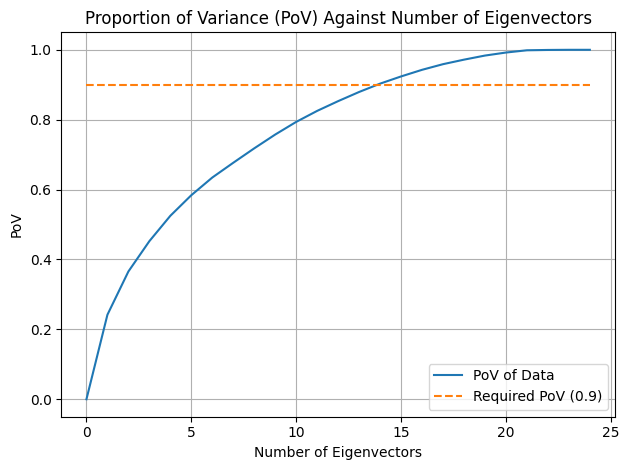

In [31]:
from sklearn.decomposition import PCA
full_pca = PCA()
X_pca = full_pca.fit_transform(X)
# PoV array (zero padded at the start)
cumulative_variance = np.zeros(len(full_pca.explained_variance_ratio_) + 1)
cumulative_variance[1:] = np.cumsum(full_pca.explained_variance_ratio_)

# Plot the cumulative variance as well as cutoff 0.9 PoV
plt.plot(cumulative_variance)
plt.plot(np.arange(cumulative_variance.shape[0]), 0.9*np.ones_like(cumulative_variance), '--')
plt.xlabel('Number of Eigenvectors')
plt.ylabel('PoV')
plt.title('Proportion of Variance (PoV) Against Number of Eigenvectors')
plt.legend(['PoV of Data', 'Required PoV (0.9)'])
plt.grid()
plt.tight_layout()
plt.show()

In [32]:
pca_comp = np.searchsorted(cumulative_variance, 0.9)
pca_comp

14